# Exploring Hotel Booking Trends: Feature Transformation for Improved Modeling

In [1]:
#importing the important library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [4]:
#Read the hotel dataset.

df = pd.read_csv("Hotel.csv")

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.shape

(119390, 32)

In [13]:
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [15]:
df.drop('company',axis=1,inplace=True)

# here we using the simple imputer to treat the missing values


In [16]:
# here we using the simple imputer to treat the missing values

imputer = SimpleImputer(strategy="median")
df[['children', 'agent']] = imputer.fit_transform(df[['children', 'agent']])
imputer = SimpleImputer(strategy="most_frequent")
df[['country']] = imputer.fit_transform(df[['country']])

In [17]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# finding the duplicate values here

In [18]:
df.duplicated().sum()

32020

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(87370, 31)

# Analyze the categorical data


<Axes: xlabel='reservation_status', ylabel='count'>

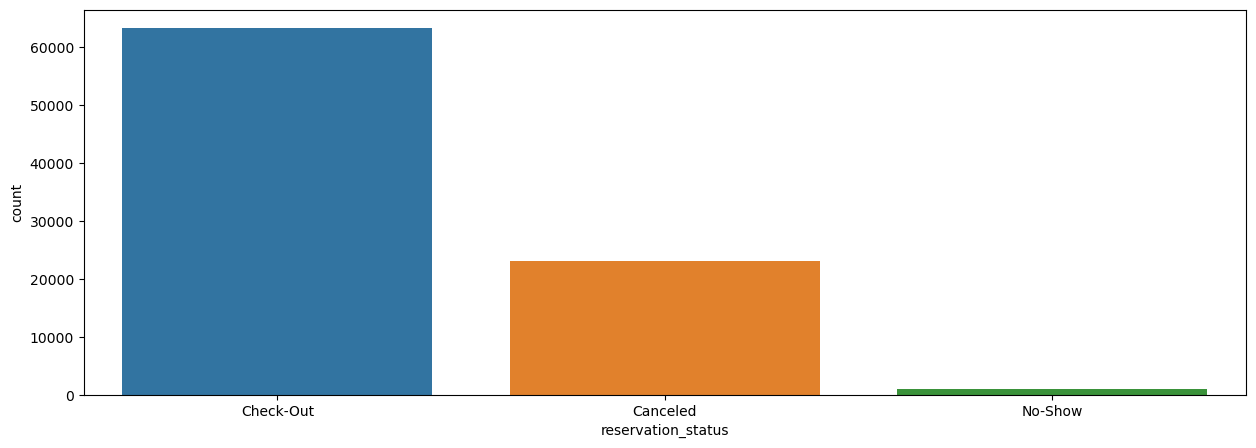

In [22]:
#Analyze the categorical data

plt.figure(figsize=(15,5))
sns.countplot(df,x='reservation_status')

<Axes: xlabel='customer_type', ylabel='count'>

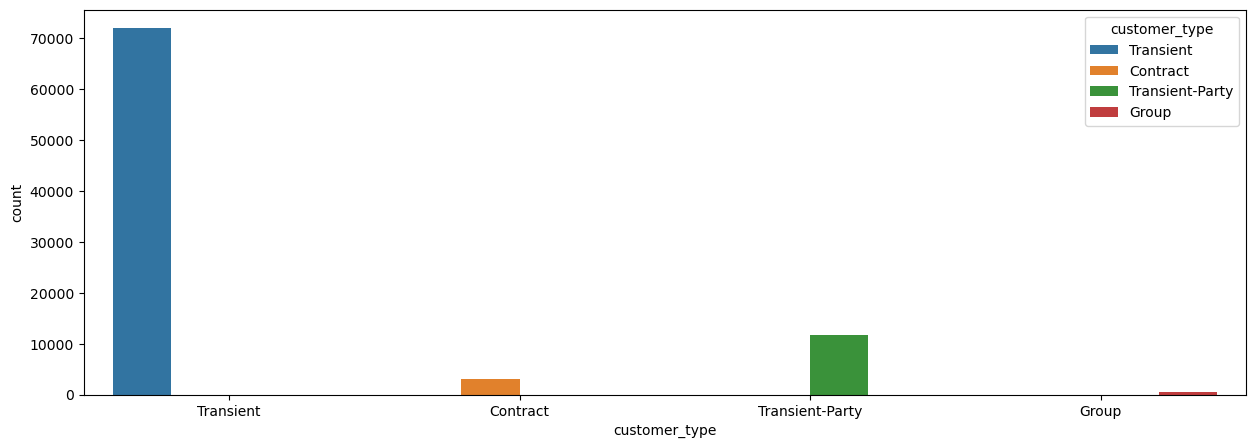

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='customer_type',hue='customer_type')

<Axes: xlabel='deposit_type', ylabel='count'>

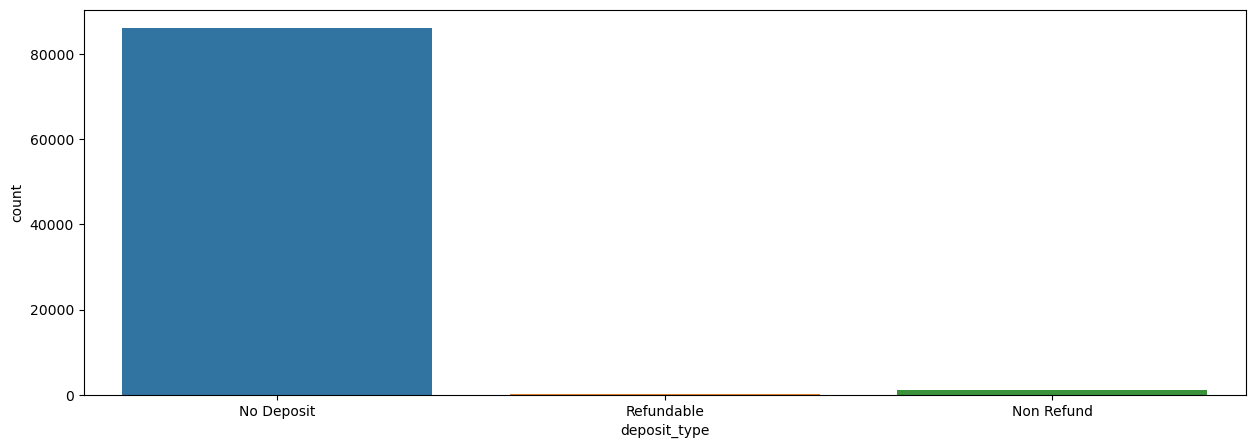

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='deposit_type')

<Axes: xlabel='assigned_room_type', ylabel='count'>

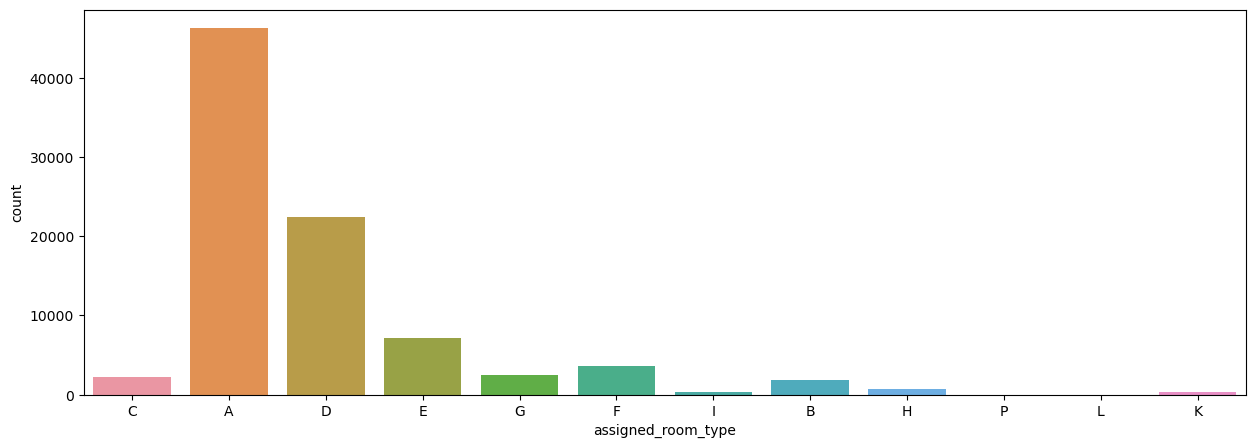

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='assigned_room_type')

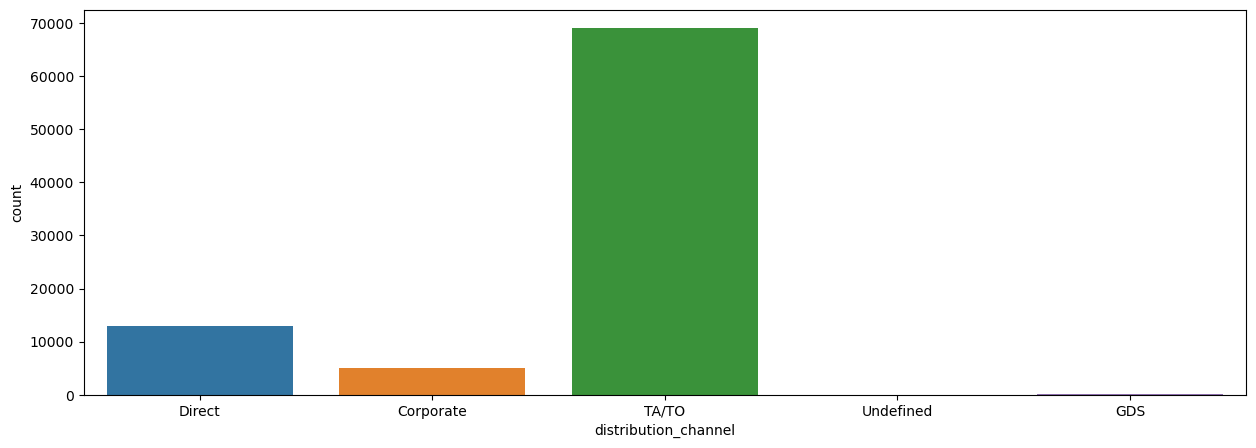

In [26]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='distribution_channel')
plt.show()

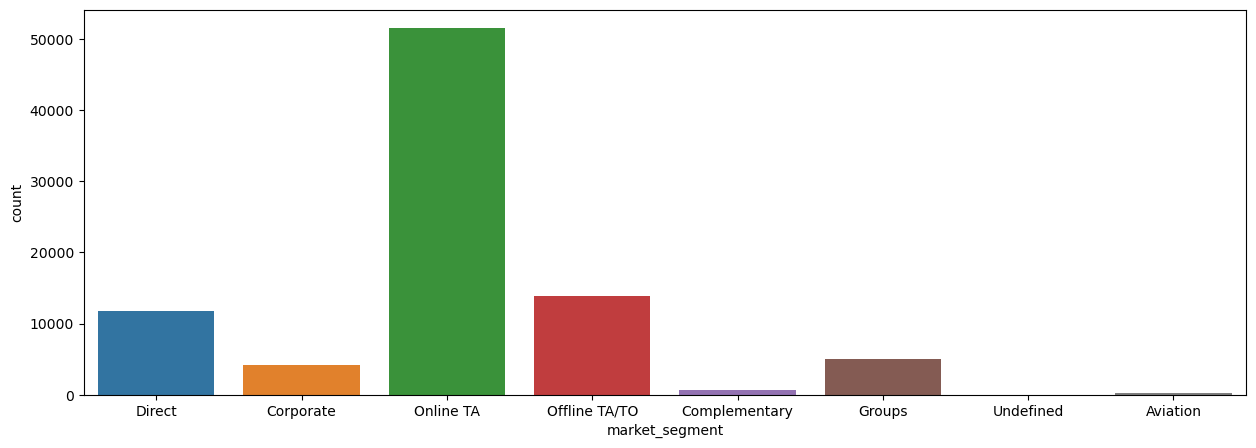

In [27]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='market_segment')
plt.show()

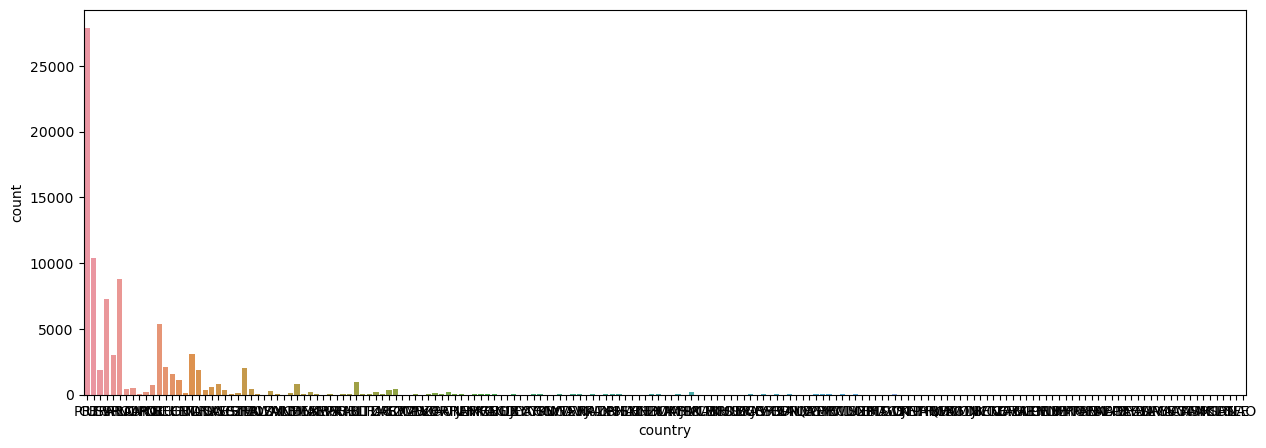

In [28]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='country')
plt.show()

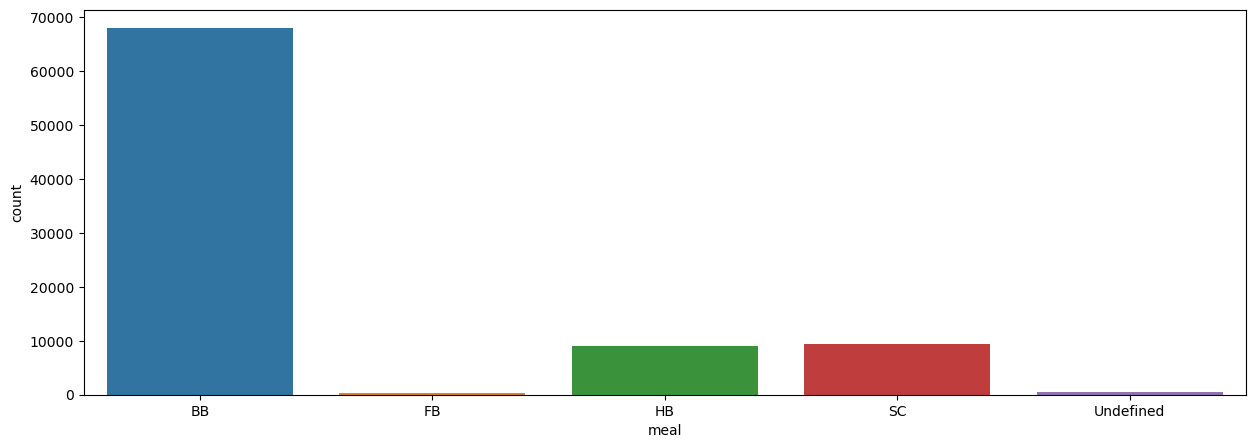

In [29]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='meal')
plt.show()

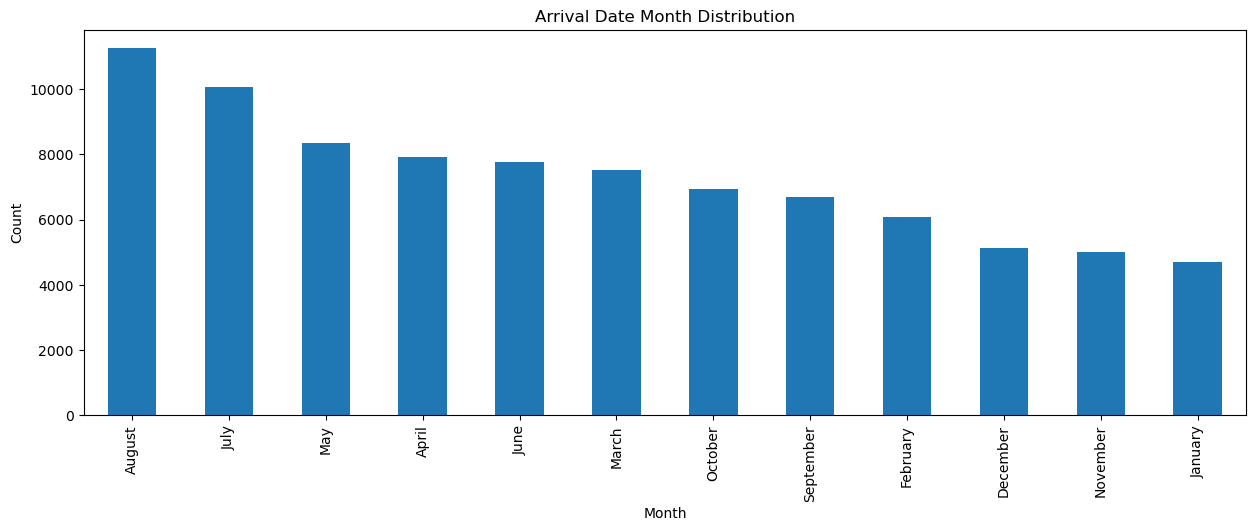

In [30]:
plt.figure(figsize=(15, 5))
df['arrival_date_month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Arrival Date Month Distribution')
plt.show()

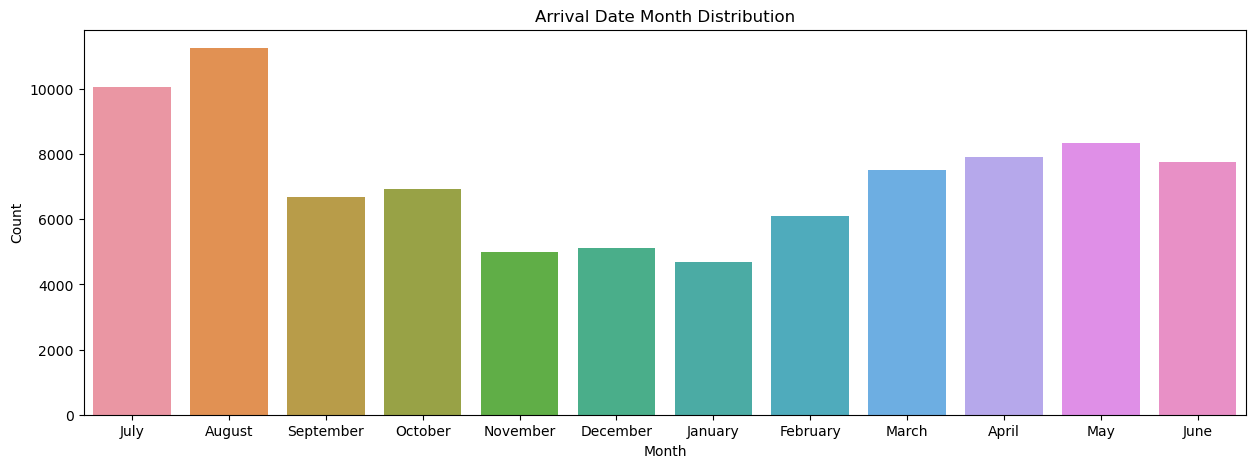

In [31]:
plt.figure(figsize=(15,5))

sns.countplot(df,x='arrival_date_month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Arrival Date Month Distribution')
plt.show()

In [32]:
# Assuming 'df' is your DataFrame and 'country' is the column containing country names

# Get the top 15 countries

top_countries = df['country'].value_counts().head(15).index


In [33]:
# Filter the DataFrame to include only the top 15 countries

df_top_countries = df[df['country'].isin(top_countries)]


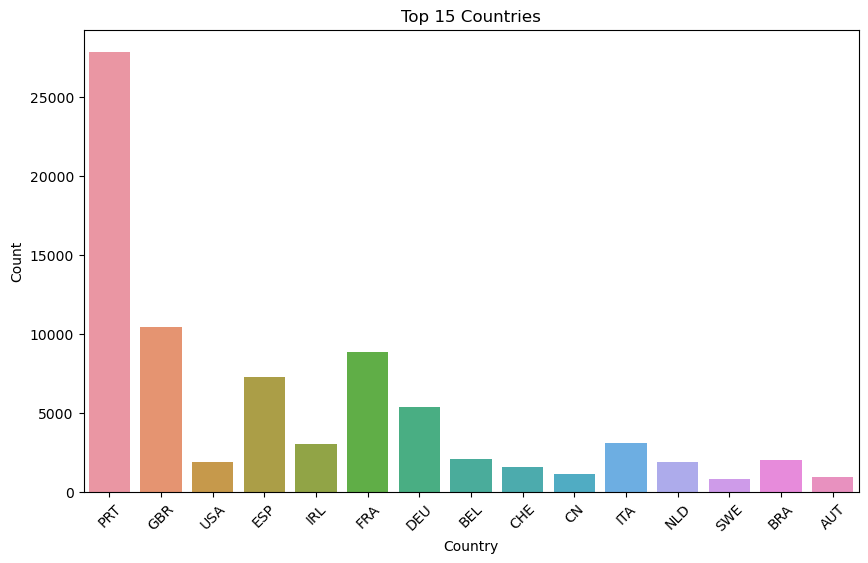

In [34]:
# Create the count plot

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

sns.countplot(data=df_top_countries, x='country')

# Rotate x-labels for better readability
plt.xticks(rotation=45)

plt.title('Top 15 Countries')
plt.xlabel('Country')
plt.ylabel('Count')

plt.show()


# spliting the dependent or independ features


In [35]:
# spliting the dependent or independ features

X = df.drop('is_canceled', axis=1)
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [36]:
y=df['is_canceled']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [37]:
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(X)

In [38]:
num_data=df[numerical]
cat_data=df[categorical]

In [39]:
num_data

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,14.0,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,14.0,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,14.0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0,104.40,0,0


In [40]:
cat_column=cat_data.columns

In [41]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [42]:
X_new = ohe.fit_transform(X[cat_column])

In [43]:
X_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

# Transform the numerical data using the Power transform.


In [44]:
#Transform the numerical data using the Power transform.

power_transformer = PowerTransformer()
num_data[['lead_time', 'adr']] = power_transformer.fit_transform(num_data[['lead_time', 'adr']])

C:\Users\HP\AppData\Local\Temp\ipykernel_11964\2904226345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[['lead_time', 'adr']] = power_transformer.fit_transform(num_data[['lead_time', 'adr']])


In [45]:
num_data

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,1.828303,2015,27,1,0,0,2,0.0,0,0,0,0,3,14.0,0,-2.949760,0,0
1,2.787022,2015,27,1,0,0,2,0.0,0,0,0,0,4,14.0,0,-2.949760,0,0
2,-1.000152,2015,27,1,0,1,1,0.0,0,0,0,0,0,14.0,0,-0.523551,0,0
3,-0.721930,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,-0.523551,0,0
4,-0.684982,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,-0.059265,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.416409,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,-0.095168,0,0
119386,0.636066,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,1.999681,0,2
119387,-0.177899,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,0.984898,0,4
119388,0.692760,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0,0.062364,0,0


In [46]:
nn_columns=num_data.columns

In [47]:
R=np.hstack((num_data[nn_columns].values,X_new))
R.shape

(87370, 1173)

# scale the data


In [48]:
# scale the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(R)
X_scaled.shape

(87370, 1173)

# Spliting the data into x_train x_test,y_train and y_test


In [49]:
#Spliting the data into x_train x_test,y_train and y_test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply the Naive Bayes Model


In [50]:
# Apply the Naive Bayes Model

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [51]:
y_pred = model.predict(X_test)

In [52]:
roc_auc = roc_auc_score(y_test, y_pred)

In [53]:
print("ROC AUC:", roc_auc)

ROC AUC: 0.9988277791933713


[[12729     3]
 [   10  4732]]


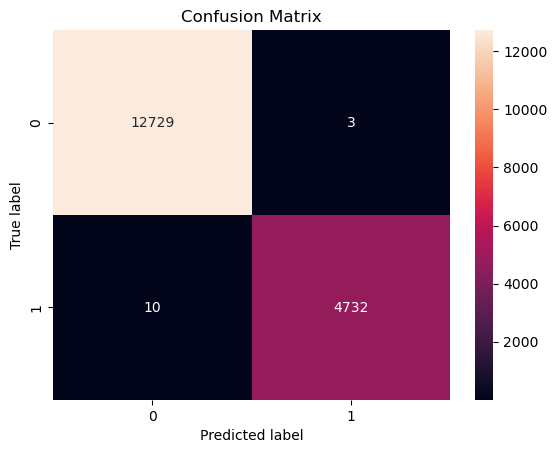

In [54]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [55]:
r2 = model.score(X_train, y_train)
print(r2)


1.0


In [56]:
r2 = model.score(X_test, y_test)
print(r2)

0.9992560375414902
